# Practical Work 2 - Multilayer Perceptron
# Question 1 : Perceptron



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Introduction
Objective: development of a simple linear perceptron and test on these three databases :

- linearly separable data ("linear" database);
- non-linearly separable data with concentric and ring data ("twocircles" database);
- non-linearly separable data with new-moon like shape ("moon" database).

A perceptron is a function of type $\sigma(w^Tx+b)$, which computes a linear combination of inputs. The vector $w$ and the biais $b$ are adjusted from a training base. The opposite of tjhe bias $b$ can be seen as an additional weight, connected to an input equal to $1$.

In classification, a [softmax function](https://en.wikipedia.org/wiki/Softmax_function) produces the class $softmax(w^Tx+b)$.

## Global Parameters of the algorithm

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

''' 
-------------------------------------------------------------------------
Network parameters
-------------------------------------------------------------------------
'''    
# Size of the batch for the training step
batch_size = 100  

# Iterations number
num_epochs = 1000

# Learning rate
lr = 0.01

''' 
-------------------------------------------------------------------------
Algorithm parameters
-------------------------------------------------------------------------
'''   
# Number of labels
num_labels = 2 

# Number of features
num_features = 2

# Name of the files (training and test datasets) 
fichiers_train = ['/content/drive/MyDrive/data/simdata/linear_data_train.csv','/content/drive/MyDrive/data/simdata/twocircles_data_train.csv','/content/drive/MyDrive/data/simdata/moon_data_train.csv']
fichiers_test = ['/content/drive/MyDrive/data/simdata/linear_data_eval.csv','/content/drive/MyDrive/data/simdata/twocircles_data_eval.csv','/content/drive/MyDrive/data/simdata/moon_data_eval.csv']


## Useful functions
### Python function for data loading
- <code>filename</code> : name of file where the data will be extracted


In [ ]:
# Extract data from the lines : label, desc1 ... descn in a compatible format
def extract_data(filename):

    labels = []
    features = []

    for line in open(filename):
        row = line.split(",")
        # labels are integers
        labels.append(int(row[0]))
        # features are reals
        features.append([float(x) for x in row[1:]])

    # Conversion into numpy matrix
    features_np = np.matrix(features).astype(np.float32)

    labels_np = np.array(labels).astype(dtype=np.uint8)
    labels_onehot = (np.arange(num_labels) == labels_np[:, None]).astype(np.float32)

    return features_np,labels_onehot

### Python function for displaying results (decision boundary and data classes)
- <code>ax</code> : the [<code>Axes</code>](https://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes) where the display will be done;
- <code>X</code> : input data for display ( features );
- <code>Y</code> : input data for display ( labels <=> ground truth );
- <code>model</code> : model for the prediction 
- <code>title</code> : title of the figure

In [ ]:
def plotResults(ax,X,Y,model,title):
    # Compute the region for the display (min and max of the features)
    mins = np.amin(X,0); 
    mins = mins - 0.1*np.abs(mins);
    maxs = np.amax(X,0); 
    maxs = maxs + 0.1*maxs;

    # Mesh generation on the rectangle used for display
    xs,ys = np.meshgrid(np.linspace(mins[0,0],maxs[0,0],300),np.linspace(mins[0,1], maxs[0,1], 300));

    # Compute the prediction from the model on the grid
    Z = np.argmax(model.predict(np.c_[xs.flatten(), ys.flatten()]), axis=-1)
    Z=Z.reshape(xs.shape[0],xs.shape[1])
    
    # Conversion into a flattened vector
    labelY = np.matrix(Y[:, 0]+2*Y[:, 1])
    labelY = labelY.reshape(np.array(X[:, 0]).shape)

    # Display the graph on the axes 'ax' into the figure 
    ax.contourf(xs, ys, Z, cmap=plt.cm.magma,alpha=.5)
    ax.scatter(np.array(X[:, 0]),np.array(X[:, 1]),c= np.array(labelY),s=20,cmap=colors.ListedColormap(['red', 'green']))
    ax.set_title(title)
    plt.tight_layout()

## Perceptron 
### Definition of the model $y=softmax(w^Tx+b)$

In [ ]:
# Model definition
model = Sequential([Dense(input_dim=num_features,units=2,activation='softmax',name='output')])
# Prints a string summary of the network
model.summary()
    

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
output (Dense)               (None, 2)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


### Optimization and prediction
- Loss function : [binary cross entropy](https://en.wikipedia.org/wiki/Cross_entropy);
- Optimization procedure :  [Adam Optimization](https://arxiv.org/abs/1412.6980).

In [ ]:
# Loss function  and optimization procedure 
adam = Adam(lr=lr)
model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['acc'])

### Training and display

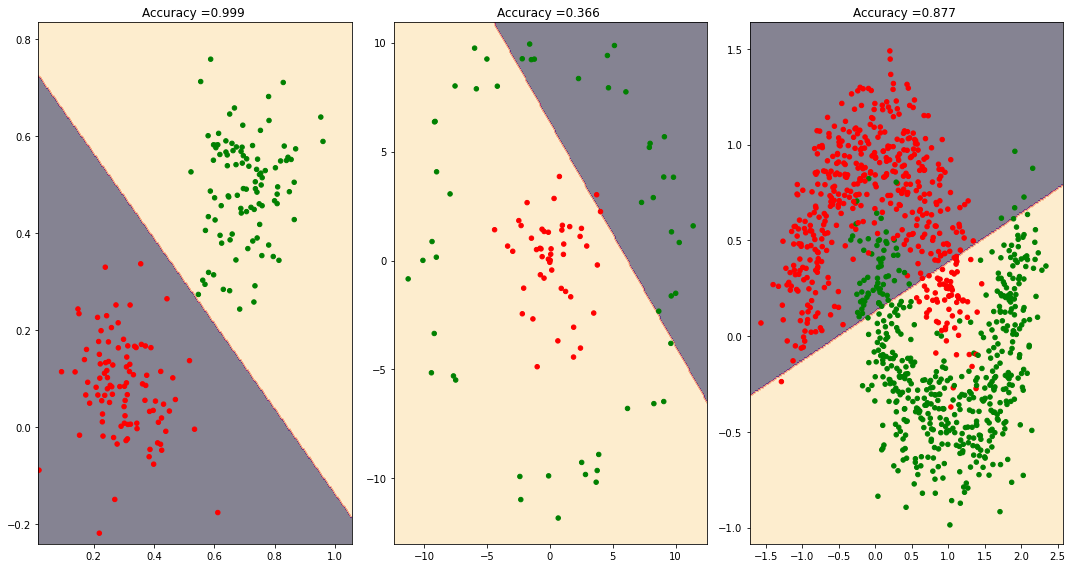

In [ ]:
fig,axs = plt.subplots(1, 3,figsize=(15,8))
for i,name_train,name_test in zip ([0,1,2],fichiers_train,fichiers_test):
    train_data,train_labels = extract_data(name_train)
    test_data, test_labels = extract_data(name_test)
    train_size,num_features = train_data.shape

    # Training
    hist=model.fit(train_data, train_labels, epochs=num_epochs, batch_size=batch_size,verbose=0)
    titre= "Accuracy ={0:5.3f} ".format(hist.history.get('acc')[-1])
    plotResults(axs[i],test_data, test_labels, model, titre)
            